In [1]:
import json # for dealing with Json files
import pandas as pd # for dealing with dataset
import csv # used to wirte the data in CVS file

Convert Json data to CVS file

In [2]:
# The pass to the Json dataset (old)
input_file = 'labeled_validation_dataset.jsonl'
# The pass to the CSV dataset (new)
output_file = 'labeled_validation_dataset.csv'

# Read from the Json file and write in the CSV file
with open(input_file, 'r', encoding='utf-8') as input, open(output_file, 'w', encoding='utf-8', newline='') as output:
    # Write the rows in csv
    writer = csv.writer(output)
    # Create column names
    writer.writerow(['paragraph', 'summary'])

    # Loop on the input file and copy his content into output file
    for line in input:
        # Load the lines from Json data
        data = json.loads(line)
        # Copy the data
        paragraph = data['paragraph']
        summary = data['summary']

        # Write the extracted data to the output file
        writer.writerow([paragraph, summary])


load csv file

In [2]:
# Read the new dataset that we was created in the above
reviews = pd.read_csv('labeled_validation_dataset.csv')
# display the dataset
reviews.head()

,paragraph,summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


# 📑 Step 2: Exploratory Data Analysis (EDA)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   paragraph  154 non-null    object
 1   summary    154 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [5]:
reviews.shape

(154, 2)

### Number of tokens in a text
> split text to tokens

    - applies the split() method to each element in the 'text' column.
    - It splits the text into a list of tokens,

> mapping lambda function

    - applies the map() method for each token in the text,
    - it calculates the length of the token using len(i)

> final result

    - dataset_train['no_tokens']= stores the lengths of the words for each text.

create column from number of tokens paragraph

In [6]:
reviews['tokens_paragraph']= reviews['paragraph'].str.split().map(lambda token: len(token))
reviews.sample(10)

,paragraph,summary,tokens_paragraph
59,أكراد العراق هم جزء مكمل للأمة الكردية التي تق...,يعتبر أكراد العراق جزءا من الأمة الكردية، وأنه...,341
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,259
17,لم تكن تلك هي المرة الأولى التي تتعرض فيها صقل...,منذ فجر التاريخ وهى تداعب أنظار الغزاة فهى الج...,349
148,وفي مساء يوم 3 يوليو 1798 م ) زحفت الحملة على ...,زحفت الحملة على القاهرةفي يوم 3 يوليو،وأخذت طر...,278
147,لم تكتف المرأة المصرية ، بالمشاركة في ثورات مص...,المرأة المصرية كانت تنتهي من تجهيز الطعام للثا...,366
71,سعت بريطانيا ولأسباب متعلقة بأزمتها أثناء وبعد...,كانت بريطانيا تواجه أزمتين شرقية ويهودية بسبب ...,342
118,النتائج التاريخية لهزيمة الصليبيين 100 رسالة ج...,واجهت الحملة الصليبية على مصر نهايتها المأساوي...,264
96,وفى اليوم التالي 9 ديسمبر عام 1946 م قبل الملك...,في 9 ديسمبر 1946 تم تشكيل وزارة برئاسة النقراش...,395
35,شهد عصر إسماعيل تطورأ كبيرا فى حياة مصر ، إذ ح...,تطور عصر إسماعيل، وبنى جيشا قوىا، وشجع قدوم ال...,355
24,شكلت الحروب الصليبية منعطفا سياسيا مهما في تار...,في تاريخ بلاد الشام جرح لا يندمل وحدث أسيف هو ...,372


visualize tokens paragraph as histogram

In [7]:
import matplotlib.pyplot as plt # make visualization
import seaborn as sns # make visualization

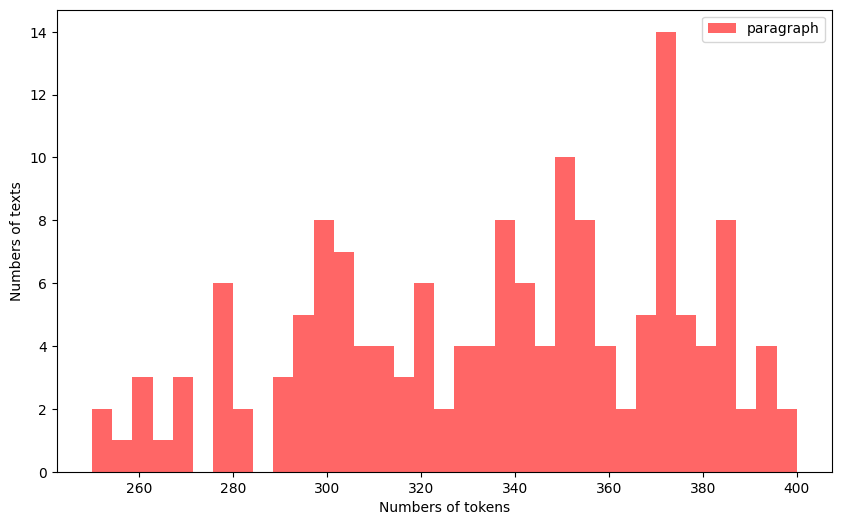

In [8]:
plt.figure(figsize=(10, 6))

reviews['tokens_paragraph'].plot(bins=35,
                            kind='hist',
                            color='red',
                            label='paragraph',
                            alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of tokens")
plt.ylabel("Numbers of texts")
plt.show()

max tokens

In [9]:
max_tokens= reviews['tokens_paragraph'].max()
max_tokens

400

show max tokens

In [10]:
reviews[reviews['tokens_paragraph'] == max_tokens]['paragraph']

116    وبعد أن قامت حكومة الوفد بإلغاء معاهدة عام 193...
Name: paragraph, dtype: object

# Step 3: Translate pharagraph & Summary


In [11]:
!pip install mtranslate

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\mtranslate.exe' -> 'C:\\Python311\\Scripts\\mtranslate.exe.deleteme'




  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3679 sha256=e9ff21683a0f3d8eda55f5f5deabece0ff9608688d4635f227c3674d1a06e10d
  Stored in directory: c:\users\ahmed khattab\appdata\local\pip\cache\wheels\38\00\7c\b947c5efaf4ddcf011a91b1566f80851ea560351fd81d029ef
Successfully built mtranslate


In [3]:
# Use Microsoft edge
from mtranslate import translate

# Arabic-to-English Translation
def translate_ar_to_en(text):
    translated_text = translate(text, "en", "ar")
    return translated_text

# English-to-Arabic Translation
def translate_en_to_ar(text):
    translated_text = translate(text, "ar", "en")
    return translated_text

In [4]:
x = translate_ar_to_en('مرحبا بكم انا احمد خطاب طالب في الجامعه الروسيه بمصر')
print(x)

Hello, I am Ahmed Khattab, a student at the Russian University in Egypt


In [5]:
y = translate_en_to_ar(x)
print(y)

مرحباً ، أنا أحمد خطاب طالب في الجامعة الروسية في مصر


# Translate the input_text to English

In [ ]:
arabic_translation_list = []
i = 0
for text in reviews['paragraph']:
    english_text = text
    arabic_translation = translate_ar_to_en(english_text)
    arabic_translation_list.append(arabic_translation)
    print(i,end=' - ')
    i+=1

reviews['translated_input'] = arabic_translation_list
print('Done')

# Translate the target_text to English

In [18]:
arabic_translation_list = []
i = 0
for text in reviews['summary']:
    english_text = text
    arabic_translation = translate_ar_to_en(english_text)
    arabic_translation_list.append(arabic_translation)
    print(i,end=' - ')
    i+=1

reviews['translated_summary'] = arabic_translation_list
print('Done')

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - Done


In [4]:
modified_df = pd.read_csv('modified_DS.csv')

In [5]:
modified_df.head()

,translated_summary,translated_input,input_replacements,target_replacements
0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'..."
1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ..."
2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'..."
3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '..."
4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'}


# Convert the Arabic names to another English

In [20]:
!pip install faker

                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 217.9 kB/s eta 0:00:08
                                              0.0/1.7 MB 219.4 kB/s eta 0:00:08
     -                                        0.1/1.7 MB 252.2 kB/s eta 0:00:07
     -                                        0.1/1.7 MB 231.8 kB/s eta 0:00:08
     -                                        0.1/1.7 MB 231.8 kB/s eta 0:00:08
     --                                       0.1/1.7 MB 249.8 kB/s eta 0:00:07
     --                                       0.1/1.7 MB 273.1 kB/s eta 0:00:06
     --                                       0.1/1.7 MB 257.8 kB/s eta 0:00:07
     

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\faker.exe' -> 'C:\\Python311\\Scripts\\faker.exe.deleteme'



In [21]:
# Download and install the large English model
import spacy
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Trainer, TrainingArguments

# T5 model
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config


In [7]:
# Load the trained model and tokenizer
model_dir = "model_summary_arabic"
tokenizer = T5Tokenizer.from_pretrained(model_dir)
model = T5ForConditionalGeneration.from_pretrained(model_dir)


In [8]:
import re
import spacy
from faker import Faker



def generate_one_syllable_name(fake):
    while True:
        name = fake.first_name()
        if len(name.split('-')) == 1:  # Check if the name has one syllable
            return name


def replace_names(sentence):
    nlp = spacy.load('en_core_web_lg')
    doc = nlp(sentence)
    name_replacements = {}
    fake = Faker()

    for ent in doc.ents:
        if ent.label_ in ['PERSON','GPE'] and not any(token.pos_ == 'NUM' for token in ent):
            name = ent.text
            if name not in name_replacements:
                replacement = generate_one_syllable_name(fake)
                sentence = re.sub(r'\b' + re.escape(name) + r'\b', replacement, sentence)
                name_replacements[name] = replacement

    return sentence, name_replacements





# Don't run this cell two times without load the intire dataset , this may occurre remove the main names.

In [24]:
# modified_data = []
# i=0
# for _, row in reviews.iterrows():
#     target_text = row['translated_summary']
#     input_text = row['translated_input']


#     # Replace names in target text
#     replaced_target_text, replacements_t = replace_names(target_text)

#     # Replace names in input text
#     replaced_input_text, replacements_i = replace_names(input_text)
#     i+=1
#     print(i,end=' - ')

#     # Save modified data
#     modified_data.append({
#         'translated_summary': replaced_target_text,
#         'translated_input': replaced_input_text,
#         'input_replacements': replacements_i,
#         'target_replacements': replacements_t,

#     })

# # Create a new DataFrame with modified data
# modified_df = pd.DataFrame(modified_data)

# # Save the modified DataFrame to a new CSV file
# modified_df.to_csv('modified_DS.csv', index=False)


1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 

In [9]:
modified_df.head()

,translated_summary,translated_input,input_replacements,target_replacements
0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'..."
1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ..."
2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'..."
3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '..."
4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'}


# Generate summary

In [12]:
# Set the model to evaluation mode
eval = model.eval()

# Input text
input_text = modified_df['translated_input']

# Function to generate summaries
def generate_summary(text):
    i = 0
    max_chunk_length = 400  # Maximum length for each chunk
    # Tokenize and chunk the input text
    input_tokens = tokenizer.tokenize(text)
    chunked_input = []
    current_chunk = []
    for token in input_tokens:
        current_chunk.append(token)
        if len(current_chunk) >= max_chunk_length:
            chunked_input.append(" ".join(current_chunk))
            i += 1
            print(i, end=' ')
            current_chunk = []
    if current_chunk:
        chunked_input.append(" ".join(current_chunk))

    # Generate summaries for each chunk
    summaries = []
    for chunk in chunked_input:
        input_ids = tokenizer.encode(chunk, return_tensors="pt")
        input_ids = input_ids.to(model.device)  # Convert input_ids to tensor and move it to the correct device
        output = model.generate(input_ids, max_length=300, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)

    # Combine the generated summaries
    combined_summary = " ".join(summaries)
    return combined_summary



In [10]:
# Split the data into four iterations
data_len = len(modified_df)
split_index_1 = data_len // 4 # 38
split_index_2 = split_index_1 * 2
split_index_3 = split_index_1 * 3


In [27]:
# Generate summaries for the first quarter of the data
first_quarter = modified_df.iloc[:split_index_1]
first_quarter['generated_summary'] = first_quarter['translated_input'].apply(generate_summary)
first_quarter.to_csv('summary/first_quarter.csv', index=False)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\ahmed khattab\AppData\Local\Temp\ipykernel_18124\1360007413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_quarter['generated_summary'] = first_quarter['translated_input'].apply(generate_summary)


In [28]:
# Generate summaries for the second quarter of the data
second_quarter = modified_df.iloc[split_index_1:split_index_2]
second_quarter['generated_summary'] = second_quarter['translated_input'].apply(generate_summary)
second_quarter.to_csv('summary/second_quarter.csv', index=False)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\ahmed khattab\AppData\Local\Temp\ipykernel_18124\2643187582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_quarter['generated_summary'] = second_quarter['translated_input'].apply(generate_summary)


In [29]:
# Generate summaries for the third quarter of the data
third_quarter = modified_df.iloc[split_index_2:split_index_3]
third_quarter['generated_summary'] = third_quarter['translated_input'].apply(generate_summary)
third_quarter.to_csv('summary/third_quarter.csv', index=False)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\ahmed khattab\AppData\Local\Temp\ipykernel_18124\644094111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_quarter['generated_summary'] = third_quarter['translated_input'].apply(generate_summary)


In [13]:
# Generate summaries for the fourth quarter of the data
fourth_quarter = modified_df.iloc[split_index_3:]
fourth_quarter['generated_summary'] = fourth_quarter['translated_input'].apply(generate_summary)
fourth_quarter.to_csv('summary/fourth_quarter.csv', index=False)

1 1 1 1 

Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\ahmed khattab\AppData\Local\Temp\ipykernel_18236\3884749934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_quarter['generated_summary'] = fourth_quarter['translated_input'].apply(generate_summary)


In [15]:
# Merge the four CSV files
summarized_data = pd.concat([
    pd.read_csv('summary/first_quarter.csv'),
    pd.read_csv('summary/second_quarter.csv'),
    pd.read_csv('summary/third_quarter.csv'),
    pd.read_csv('summary/fourth_quarter.csv')
])

summarized_data.to_csv('summarized_data.csv', index=False)

summarized_data.head()

,translated_summary,translated_input,input_replacements,target_replacements,generated_summary
0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'...",The writer begins presenting the fourth book u...
1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ...",The diplomats of the two countries did not rec...
2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'...",French General Crystal declared the French Man...
3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '...",The Arab state of John is not any country and ...
4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'},The Syrian people insist on the independence o...


# Retrive the Arabic names again

In [18]:
def reverse_replacements(sentence, replacements):
    for name, replacement in replacements.items():
        sentence = sentence.replace(replacement, name)
    return sentence




# Step 4: Load the Pretrained Transformer Model (mT5) on GPU

In [28]:
!pip install transformers[torch]

In [29]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [187]:
summarized_data = pd.read_csv('generated_summary.csv')

In [188]:
summarized_data.head()

,Unnamed: 0,translated_summary,translated_input,input_replacements,target_replacements,generated_summary
0,0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'...",The writer begins presenting the fourth book u...
1,1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ...",The diplomats of the two countries did not rec...
2,2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'...",The Wi lay at of Raymond was established after...
3,3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '...","Kin an a is the mother of the country, and the..."
4,4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'},The Syrian people insist on the independence o...


In [20]:
# Define your custom dataset
class CustomDataset(Dataset):
    def __init__(self, tokenizer, data):
        self.tokenizer = tokenizer
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_text = str(self.data.loc[index, "translated_input"])
        target_text = str(self.data.loc[index, "translated_summary"])

        encoding = self.tokenizer.prepare_seq2seq_batch(
            src_texts=[input_text],
            tgt_texts=[target_text],
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding.input_ids.squeeze(),
            "attention_mask": encoding.attention_mask.squeeze(),
            "labels": encoding.labels.squeeze()
        }

In [21]:
# Initialize the T5 tokenizer and model

tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")


C:\Users\ahmed khattab\AppData\Roaming\Python\Python311\site-packages\transformers\models\t5\tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [33]:
# Create your training dataset
train_dataset = CustomDataset(tokenizer, modified_df)

# Set up the training arguments
training_args = TrainingArguments(
    output_dir="./",
    num_train_epochs=100,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=9,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,

)

# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=None
)

# Start training
trainer.train()

# Save the trained model
output_dir = "model_summary_arabic"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3745: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on t

Step,Training Loss
100,6.378200
200,0.817600
300,0.647600
400,0.591000
500,0.512800
600,0.470200
700,0.424000
800,0.378300
900,0.348900
1000,0.310200


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3745: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is depr

('model_summary_arabic/tokenizer_config.json',
 'model_summary_arabic/special_tokens_map.json',
 'model_summary_arabic/spiece.model',
 'model_summary_arabic/added_tokens.json')

# Step 5: Load the model for inference (Predict)

In [36]:
# Set the model to evaluation mode
eval = model.eval()

# Input text
input_text = modified_df['translated_input']

# Function to generate summaries
def generate_summary(text):
    i = 0
    max_chunk_length = 400  # Maximum length for each chunk
    # Tokenize and chunk the input text
    input_tokens = tokenizer.tokenize(text)
    chunked_input = []
    current_chunk = []
    for token in input_tokens:
        current_chunk.append(token)
        if len(current_chunk) >= max_chunk_length:
            chunked_input.append(" ".join(current_chunk))
            i+=1
            print(i,end = ' ')
            current_chunk = []
    if current_chunk:
        chunked_input.append(" ".join(current_chunk))

    # Generate summaries for each chunk
    summaries = []
    for chunk in chunked_input:
        input_ids = tokenizer.encode(chunk, return_tensors="pt")
        input_ids = input_ids.to(model.device)  # Convert input_ids to tensor and move it to the correct device
        output = model.generate(input_ids, max_length=300, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)

    # Combine the generated summaries
    combined_summary = " ".join(summaries)
    return combined_summary

# Generate column "generate summary" in the DataFrame
modified_df['generated_summary'] = modified_df['translated_input'].apply(generate_summary)

reviews.head()

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [189]:
summarized_data.head()

,Unnamed: 0,translated_summary,translated_input,input_replacements,target_replacements,generated_summary
0,0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'...",The writer begins presenting the fourth book u...
1,1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ...",The diplomats of the two countries did not rec...
2,2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'...",The Wi lay at of Raymond was established after...
3,3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '...","Kin an a is the mother of the country, and the..."
4,4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'},The Syrian people insist on the independence o...


In [190]:
summarized_data['generated_summary'][0]

'The writer begins presenting the fourth book under the title From Disaster to Challenge, where he explains how Darius was happy with its victory in 67, and how the war of attrition began, then he talks about the death of Jennifer and takes over the rule of Jody. He says : This day was the worst defeat in the history of the Israeli army, then he moves us to the Syrian front, then returns again to the war diaries from October 9 -7 to October 13 -9, then he talks about the breach or what was known as the Chinese farm operation, then moves on to the events that took place from October 17 to 20 and relieved Lieutenant General Car rie of his position as Chief of Staff of the Egyptian Armed Forces, then the tendency to approve the request for a cease - fire. The writer presents the battle for the sei zu re of the city Su ez from October 23 to October 25, then the developments of this battle, and how, by the twenty -seventh day of October, the Israeli s had captured about eight thousand membe

# Restore the names

In [191]:
summarized_data.head()


,Unnamed: 0,translated_summary,translated_input,input_replacements,target_replacements,generated_summary
0,0,The writer begins presenting the fourth book u...,"Under the title “From Disaster to Challenge,” ...","{'Israel': 'Cynthia', 'the United Arab Republi...","{'Israel': 'Darius', 'Abdel Nasser': 'Shannon'...",The writer begins presenting the fourth book u...
1,1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Paul', 'Morocco': 'Willie'...","{'Allal Al-Fassi': 'Lynn', 'Cairo': 'Ashley', ...",The diplomats of the two countries did not rec...
2,2,Jerry declared the French mandate over Jack in...,The Wilayat of Hannah was established after th...,"{'Aleppo': 'Hannah', 'Henri Gouraud': 'Crystal...","{'Gouraud': 'Jerry', 'Syria': 'Jack', 'France'...",The Wi lay at of Raymond was established after...
3,3,"Sandra is the mother of the country, and the l...",The Arab state of John is not any country and ...,"{'Egypt': 'John', 'Morocco': 'Megan', 'Hosni M...","{'Egypt': 'Sandra', 'Hosni Mubarak': 'Joel', '...","Kin an a is the mother of the country, and the..."
4,4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Richard', 'Jabal a...",{'Syria': 'Lisa'},The Syrian people insist on the independence o...


In [ ]:
import pandas as pd

# Define the function to restore names
def restore_names(sentence, replacements):
    for name, replacement in replacements.items():
        sentence = sentence.replace(replacement, name)
    return sentence

# Apply the function to restore names on each row of the DataFrame
restored_df = summarized_data.copy()
restored_df['generated_summary'] = restored_df.apply(lambda row: restore_names(row['generated_summary'], eval(row['input_replacements'])), axis=1)

# Save the restored DataFrame to a new CSV file
restored_df.to_csv('restored_summaries.csv', index=False)


In [250]:
restored_df['generated_summary'][4]

4    The Syrian people insist on the independence o...
4    The Romans launched a series of raids that end...
4    The Ma m l uk leaders strongly resisted the au...
4    The Cru s a der s defeated the Ma m l uk s in ...
Name: generated_summary, dtype: object

In [269]:
import pandas as pd



summary = summarized_data['generated_summary'].tolist()
replacements = summarized_data['target_replacements'].to_dict()



summary = ["The writer begins presenting the fourth book under the title From Disaster to Challenge, where he explains how Darius was happy with its victory in 67, and how the war of attrition began, then he talks about the death of Jennifer and takes over the rule of Jody. He says: This day was the worst defeat in the history of the Israeli army, then he moves us to the Syrian front, then returns again to the war diaries from October 9-7 to October 13-9, then he talks about the breach or what was known as the Chinese farm operation, then moves on to the events that took place from October 17 to 20 and relieved Lieutenant General Car rie of his position as Chief of Staff of the Egyptian Armed Forces, then the tendency to approve the request for a cease-fire. The writer presents the battle for the seizure of the city Suez from October 23 to October 25, then the developments of this battle, and how, by the twenty-seventh day of October, the Israelis had captured about eight thousand members of the Egyptian forces, most of them from the supply and supply units."]
replacements = {'Israel': 'Darius', 'Abdel Nasser': 'Shannon', 'Anwar Sadat': 'Herbert', 'Egypt': 'Jody', 'Syria': 'Julia'}

# Function to perform the replacements
def replace_words(word):
    val = []
    for key, value in replacements.items():
        if word == value:
            val.append(key)
    return val.append(word)

# Perform the replacements for each word in the summary list
transformed_summary = [[replace_words(word) 

# Create a DataFrame from the transformed summary
df = pd.DataFrame(transformed_summary)

# Return the DataFrame
df



,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [208]:
dic = {'one':'1' , 'two':'2' , 'three':'3'}

text = 'when i was one i was play football with two or three'.split()


text_list = []
for i in range(len(text)):
    if text[i] in dic:
        text[i] = dic[text[i]]
        text_list.append(str(text[i]))
    else : text_list.append(str(text[i]))
    
text = ' '.join(text_list)
text

1
2
3


In [55]:


restored_data = []

for _, row in modified_df.iterrows():
    replaced_target_text = row['translated_summary']
    replaced_input_text = row['translated_input']
    replacements_t = eval(row['target_replacements'])  # Convert string representation to dictionary
    replacements_i = eval(row['input_replacements'])  # Convert string representation to dictionary

    # Restore original names in target text
    restored_target_text = reverse_replacements(replaced_target_text, replacements_t)

    # Restore original names in input text
    restored_input_text = reverse_replacements(replaced_input_text, replacements_i)

    # Save restored data
    restored_data.append({
        'translated_summary': restored_target_text,
        'translated_input': restored_input_text,
    })

# Create a new DataFrame with restored data
restored_df = pd.DataFrame(restored_data)

# Save the restored DataFrame to a new CSV file
restored_df.to_csv('restored_DS.csv', index=False)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:6                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models/t5/modeling_t5.py:1683 in forward    │
│                                                                                                  │
│   1680 │   │   # Encode if needed (training, first prediction pass)                              │
│   1681 │   │   if encoder_outputs is None:                                                       │
│   1682 │   │   │   # Convert encoder inputs in embeddings if needed                              │
│ ❱ 1683 │   │   │   encoder_outputs = self.encoder(                                               │
│   1684 │   │   │   │   input_ids=input_ids,                                                      │
│   1685 │   │   │   │   attention_mask=attention_mask,                                            │
│   1686 │   │   │   │   inputs_embeds=inputs_embeds,                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models/t5/modeling_t5.py:977 in forward     │
│                                                                                                  │
│    974 │   │   │   │   f"You cannot specify both {err_msg_prefix}input_ids and {err_msg_prefix}  │
│    975 │   │   │   )                                                                             │
│    976 │   │   elif input_ids is not None:                                                       │
│ ❱  977 │   │   │   input_shape = input_ids.size()                                                │
│    978 │   │   │   input_ids = input_ids.view(-1, input_sha

translate generated summary in new column called "translated_generated_summary"

In [ ]:
reviews.to_csv('new.csv')

In [ ]:
# # Function to translate the generated summaries
# def translate_summary(summary):
#     input_ids = tokenizer.encode(summary, return_tensors="pt")
#     translated_output = model.generate(input_ids)
#     translated_summary = tokenizer.decode(translated_output[0], skip_special_tokens=True)
#     return translated_summary


reviews['translated_generated_summary'] = reviews['generated_summary'].apply(translate_en_to_ar)
print('Done')

Done


In [ ]:
reviews.head()

,paragraph,summary,tokens_paragraph,translated_input,translated_summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...,335,"Under the title From Disaster to Challenge, th...",The writer begins presenting the fourth book u...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...,277,The diplomats of these two countries did not r...,The diplomats of the two countries did not rec...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...,339,The mandate of Aleppo was established after th...,Gouraud declared the French mandate over Syria...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...,282,The Arab state of Egypt is not any country and...,"Egypt is the mother of the country, and the le..."
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,259,The Syrians insist on the independence of thei...,The Syrian people insist on the independence o...


# Step 6: Evaluation using ROUGE metrics
+ ROUGE: (Recall-Oriented Understudy for Gisting Evaluation)
+ used for evaluating the quality of text summarization outputs.

Initialize object from ROUGE metric

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

In [ ]:
rouge = Rouge()

+ Prepare the references and hypotheses:
  - column [summary] is references..
      - Convert the reference summaries from the dataset into a list
  - column [generated_summary] is hypotheses..
      - Convert the generated summaries into a list

In [ ]:
references = reviews['summary'].tolist()
hypotheses = reviews['translated_generated_summary'].tolist()

- Pass hypotheses and references for method get_scores to compute the ROUGE scores:
- avg= True >> compute average scores for all the scores.

In [ ]:
scores = rouge.get_scores(hypotheses, references, avg=True)

- ROUGE-1: measures the overlap of `unigrams (single words)` between the generated summary (hypotheses) and the reference summary.

- ROUGE-2: measures the overlap of `bigrams (pairs of consecutive words)` between the generated summary (hypotheses) and the reference summary.

- ROUGE-L: measures the `longest common subsequence (LCS)` between the generated summary (hypotheses) and the reference summary.

- Precision: ratio of the number of overlapping unigrams (ROUGE-1), bigrams (ROUGE-2) or LCS (ROUGE-L) between the generated and reference summaries to the number of unigrams or bigrams or LCS in the `generated summary`.

- Recall: ratio of the number of overlapping unigrams (ROUGE-1), bigrams (ROUGE-2) or LCS (ROUGE-L) between the generated and reference summaries to the number of unigrams or bigrams or LCS in the `reference summary`.

- ROUGE-1 Score: `harmonic mean` of precision and recall.

In [ ]:
print("ROUGE-1: ", scores['rouge-1'])
print("ROUGE-2: ", scores['rouge-2'])
print("ROUGE-L: ", scores['rouge-l'])
print("Precision: ", scores['rouge-1']['p'])
print("Recall: ", scores['rouge-1']['r'])
print("ROUGE-1 Score: ", scores['rouge-1']['f'])

ROUGE-1:  {'r': 0.3308031581446099, 'p': 0.2542094324798377, 'f': 0.28333861105266034}
ROUGE-2:  {'r': 0.13341039117132267, 'p': 0.09618884396667958, 'f': 0.10992527927531713}
ROUGE-L:  {'r': 0.29782247253994265, 'p': 0.2294899976887636, 'f': 0.2554882608229676}
Precision:  0.2542094324798377
Recall:  0.3308031581446099
ROUGE-1 Score:  0.28333861105266034


# Step 7: Save the model

In [ ]:
# Save the trained model
output_dir = "model_summary_arabic"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('model_summary_arabic/tokenizer_config.json',
 'model_summary_arabic/special_tokens_map.json',
 'model_summary_arabic/spiece.model',
 'model_summary_arabic/added_tokens.json')

# Step 8: Test
  + with test dataset !!

# Final Step:
  + create Dataframe "translated_generated_summary" has one column called "summary"
  + convert it to json file called "predictions.jsonl
  + compress it to zip format which will be submitted

In [ ]:
# create DataFrame from column ""
dataset_predictions= pd.DataFrame(reviews['translated_generated_summary'])
dataset_predictions.head()

,translated_generated_summary
0,يبدأ الكاتب في تقديم الكتاب الرابع بعنوان من ك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...
2,لقد أعلننا التاريخ الفرنسي على سوريا من أجل تأ...
3,مصر أم الوطن ، وقلب العرب ، والمساندة الصامدة ...
4,فكما رفض السوريون السيطرة العثمانية ، رفضوا في...


In [ ]:
# convert DataFrame to JSON data
dataset_predictions = dataset_predictions.to_json("predictions.jsonl", lines=True, orient='records', force_ascii=False)